In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games=pd.read_csv("data/games.csv",usecols=["app_id","title"])
rec=pd.read_csv("data/recommendations.csv",usecols=["app_id","is_recommended","hours","user_id"])
metadata=pd.read_json("data/games_metadata.json",lines=True)

In [3]:
rec.shape[0]

41154794

In [4]:
games=games.merge(metadata,on="app_id")

In [5]:
games.head()

,app_id,title,description,tags
0,13500,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,,[Action]
2,113020,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [7]:
games[games["app_id"]==1361210]

,app_id,title,description,tags
12777,1361210,Warhammer 40000: Darktide,,[]


In [9]:
count=0
for i in range(games.shape[0]):
    if (len(games.iloc[i].tags)==0):
        print(games.iloc[i].title)
        count+=1
print(count)

Barony
Postmouse Soundtrack
Tiny Bunny: Full Soundtrack
Train Simulator: Western Pacific GP20 High Nose Loco Add-On
Steel Division 2
UNREAL LIFE Original Soundtrack 'Sound of the Mind'
Far Cry® 5
Touhou Mystia's Izakaya - Soundtrack 3
Sid Meier's Civilization® VI: Vietnam & Kublai Khan Pack
Guilty Gear -Strive- Original Soundtrack Necessary Discrepancy Disc 2
Crash Bandicoot™ 4: It’s About Time
New Tales from the Borderlands
Happy Game Soundtrack + Art Book
Cuphead DLC - Official Soundtrack
Escape the Backrooms
The Sims™ 4 City Living
Rain World: Downpour - Soundtrack
Craftopia
Streets of Rage 4
The Binding of Isaac: Afterbirth
Wayfinder - Initiate Founder’s Pack
WorldBox - God Simulator
Cruelty Squad
Kena: Bridge of Spirits Soundtrack
Skul: The Hero Slayer Soundtrack
Age of Mythology: Extended Edition
Touhou Blooming Chaos 2 - Soundtrack 1
Wobbledogs - Original Soundtrack
Yet Another Zombie Survivors
BONEWORKS
Halls of Torment
Guild Wars 2
iRacing
House Flipper
Stubbs the Zombie in Re

In [6]:
rec.head()

,app_id,is_recommended,hours,user_id
0,975370,True,36.3,51580
1,304390,False,11.5,2586
2,1085660,True,336.5,253880
3,703080,True,27.4,259432
4,526870,True,7.9,23869


In [7]:
label_count={}
for game_tag in games["tags"]:
    for tag in game_tag:
        if tag not in label_count:
            label_count[tag]=0
        else:
            label_count[tag]+=1
print(label_count)

{'Action': 21896, 'Adventure': 20182, 'Parkour': 529, 'Third Person': 3173, 'Great Soundtrack': 3911, 'Singleplayer': 22565, 'Platformer': 3997, 'Time Travel': 251, 'Atmospheric': 8687, 'Classic': 1315, 'Hack and Slash': 1448, 'Time Manipulation': 276, 'Gore': 3184, 'Fantasy': 5173, 'Story Rich': 7148, 'Dark': 2569, 'Open World': 3602, 'Controller': 2757, 'Dark Fantasy': 1239, 'Puzzle': 7584, 'Co-op': 3213, 'Stealth': 1171, 'Indie': 27956, 'Heist': 153, 'Local Co-Op': 1398, 'Strategy': 11092, 'Online Co-Op': 1770, 'Top-Down': 2602, 'Multiplayer': 6574, 'Crime': 492, 'Casual': 17843, 'Pixel Graphics': 6027, 'Local Multiplayer': 1727, '2D': 11437, 'Loot': 580, 'Zombies': 1386, 'Survival': 3264, 'Horror': 4788, 'Cartoony': 2244, 'Survival Horror': 1644, 'Third-Person Shooter': 914, 'Anime': 5001, 'Roguelike': 2011, 'Tower Defense': 888, 'RPG': 10155, 'Sci-fi': 4112, 'Dungeon Crawler': 1323, 'Perma Death': 818, 'Procedural Generation': 1551, 'Resource Management': 1384, 'Difficult': 3922, 

In [8]:
label_count2={"tags":list(label_count.keys()),"count":list(label_count.values())}

In [19]:
label_count_df=pd.DataFrame(label_count2,columns=["tags","count"])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

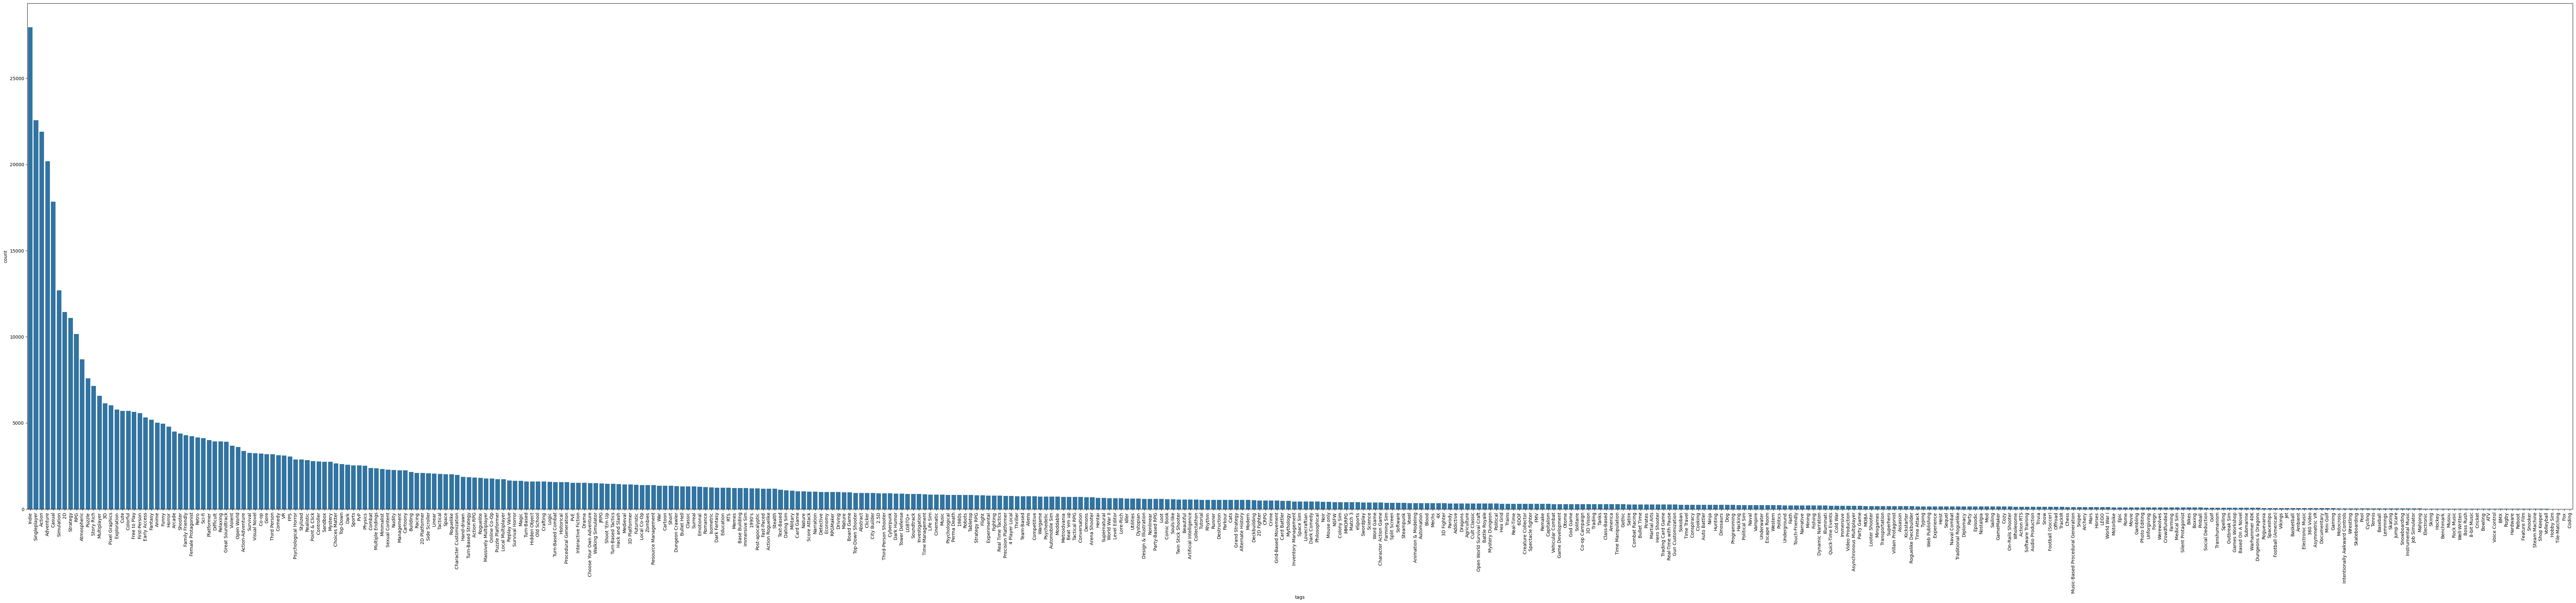

In [28]:
plt.figure(figsize=(100, 20))             
sns.barplot(    
    x="tags",
    y="count",
    data=label_count_df.sort_values(by="count", ascending=False),
)
plt.xticks(rotation=90)


In [10]:
all_tags=list(set(tag for game_tag in games['tags'] for tag in game_tag if label_count[tag]>=0))
print(len(all_tags))

441


In [11]:

def create_tag_vector(tags, all_tags):  
    vector = [0] * len(all_tags)
    for tag in tags:  
        if tag in all_tags:
            vector[all_tags.index(tag)] = 1
    return vector
tag_vectors=[]
for game_tag in games['tags']:
    tag_vectors.append(create_tag_vector(game_tag,all_tags))
game_tags_vec=pd.DataFrame(data=tag_vectors,columns=all_tags)


In [12]:
game_tags_vec.head()

,Action-Adventure,Multiple Endings,Choose Your Own Adventure,Tactical RPG,Ninja,Violent,Hidden Object,Combat Racing,Soundtrack,Sokoban,...,Martial Arts,Science,Old School,Experience,Conspiracy,CRPG,Archery,Gore,Hentai,Military
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
game_bigdata = games.join(game_tags_vec)
game_bigdata

,app_id,title,description,tags,Action-Adventure,Multiple Endings,Choose Your Own Adventure,Tactical RPG,Ninja,Violent,...,Martial Arts,Science,Old School,Experience,Conspiracy,CRPG,Archery,Gore,Hentai,Military
0,13500,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22364,BRINK: Agents of Change,,[Action],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113020,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,226560,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,249050,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,,[],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50868,1272080,PAYDAY 3,,[],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50869,1402110,Eternights,,[],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50870,2272250,Forgive Me Father 2,Embark on a journey into the darkest nightmare...,"[Early Access, FPS, Action, Retro, First-Perso...",0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [14]:
game_bigdata=game_bigdata.drop(["title","description"],axis=1)

In [15]:
game_bigdata.head()

,app_id,tags,Action-Adventure,Multiple Endings,Choose Your Own Adventure,Tactical RPG,Ninja,Violent,Hidden Object,Combat Racing,...,Martial Arts,Science,Old School,Experience,Conspiracy,CRPG,Archery,Gore,Hentai,Military
0,13500,"[Action, Adventure, Parkour, Third Person, Gre...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22364,[Action],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113020,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,226560,"[Zombies, Adventure, Survival, Action, Third P...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,249050,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
count={}
for i in range(rec.shape[0]):
    if rec.loc[i].user_id not in count:
        count[rec.loc[i].user_id]=0
    else: count[rec.loc[i].user_id]+=1


KeyboardInterrupt: 

In [19]:
sorted_count=list(sorted(count.items(),key=lambda x:x[1],reverse=True))
print(sorted_count[:30])

[(11764552, 6044), (5112758, 4151), (11656130, 3839), (5669734, 3478), (11553593, 3391), (5390510, 3022), (4457971, 2719), (4318160, 2713), (574944, 2625), (1365585, 2469), (6595218, 2436), (1353327, 2271), (11283041, 2150), (11783475, 1867), (6657105, 1851), (12108439, 1839), (12007469, 1815), (437852, 1795), (11250992, 1761), (12231744, 1683), (8040965, 1672), (5164055, 1663), (13934014, 1660), (3492627, 1652), (12499337, 1629), (11217872, 1584), (11578878, 1480), (11681010, 1435), (8854769, 1356), (599890, 1346)]


In [17]:
import pickle as pkl

In [18]:
with open("pkl_files/user_review_count.pkl","rb") as filename:
    review_count=pkl.load(filename)

In [20]:
print(review_count[400:500])

[(5661782, 405), (7379653, 404), (5999201, 404), (5549044, 404), (9101805, 404), (13221156, 403), (11865960, 402), (1556801, 402), (10109693, 402), (10808108, 401), (11969215, 400), (11899001, 399), (11341246, 399), (12127437, 399), (1240206, 398), (1369714, 398), (11344087, 398), (6431373, 398), (14051801, 397), (3401434, 396), (1028702, 396), (11514800, 396), (6143554, 395), (7149930, 395), (6744799, 394), (13343948, 393), (7174753, 392), (7387097, 392), (25966, 389), (4761989, 389), (8058117, 389), (13771331, 389), (6370545, 389), (9478150, 388), (10053880, 388), (480337, 388), (4361892, 388), (11504525, 387), (11194688, 387), (13968357, 387), (6342848, 385), (12584287, 385), (10255828, 385), (11543414, 385), (12461761, 384), (9293725, 383), (12499094, 383), (7462711, 382), (5328571, 382), (10546013, 381), (652540, 380), (7719237, 380), (5727907, 380), (11393302, 378), (5838042, 378), (13836851, 378), (4186948, 378), (12043516, 378), (12673517, 377), (11387850, 376), (11857485, 376)

In [ ]:
hello

In [133]:
top_users=[x[0] for x in review_count[:50]]
top_users

[11764552,
 5112758,
 11656130,
 5669734,
 11553593,
 5390510,
 4457971,
 4318160,
 574944,
 1365585,
 6595218,
 1353327,
 11283041,
 11783475,
 6657105,
 12108439,
 12007469,
 437852,
 11250992,
 12231744,
 8040965,
 5164055,
 13934014,
 3492627,
 12499337,
 11217872,
 11578878,
 11681010,
 8854769,
 599890,
 6748574,
 10610195,
 11535683,
 11009760,
 11804354,
 830585,
 13933393,
 748899,
 90182,
 7098395,
 11382771,
 7455040,
 4263468,
 14041074,
 14211777,
 5270636,
 4624276,
 13872561,
 12955416,
 9231134]

In [41]:
def data_builder(user_id):
    user_reviews=rec[rec["user_id"]==user_id]
    user_reviews=user_reviews.merge(game_bigdata,on="app_id")
    return user_reviews

In [131]:
def build_train_test_set(user_id):
    data=rec[rec["user_id"]==user_id]
    data=data.merge(game_bigdata,on="app_id")
    rows_to_drop=[]
    for index, row in data.iterrows():
        if len(data.iloc[index]["tags"])==0:
            rows_to_drop.append(index)
    data=data.drop(rows_to_drop)
    y=data["is_recommended"]
    y=y.map({True:1,False:0})
    data=data.drop(["app_id","user_id","is_recommended","hours","tags"],axis=1)
    y=y.to_numpy()
    x=data.to_numpy()
    return (x,y)

In [97]:
data=data_builder(5112758)

In [98]:
data

,app_id,is_recommended,hours,user_id,tags,Skiing,Robots,Survival,Beat 'em up,Education,...,Early Access,Medical Sim,Vampire,Linear,Dog,First-Person,Racing,Real Time Tactics,Hand-drawn,MMORPG
0,552990,True,3.8,5112758,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1794680,True,0.4,5112758,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,537180,True,0.1,5112758,"[Free to Play, Anime, MMORPG, Massively Multip...",0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,872200,True,1.0,5112758,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,582660,True,1.7,5112758,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,1026820,True,1.0,5112758,"[Free to Play, Relaxing, Pixel Graphics, Casua...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4148,201790,True,0.0,5112758,"[Tower Defense, Co-op, Action, Strategy, Onlin...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4149,1969870,False,0.0,5112758,"[PvP, FPS, Free to Play, Multiplayer, Shooter,...",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4150,575720,True,1.0,5112758,"[Free to Play, Card Game, Strategy, RPG, MMORP...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
rows_to_drop=[]
for index, row in data.iterrows():
    if len(data.iloc[index]["tags"])==0:
        rows_to_drop.append(index)

In [104]:
print(rows_to_drop)

[0, 1, 3, 4, 5, 7, 8, 9, 12, 14, 16, 17, 23, 25, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 43, 46, 48, 53, 55, 58, 60, 61, 62, 63, 68, 75, 76, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89, 91, 95, 96, 97, 98, 100, 101, 102, 106, 109, 110, 111, 113, 116, 117, 120, 121, 122, 124, 126, 127, 128, 132, 134, 137, 139, 140, 142, 143, 145, 146, 147, 148, 152, 153, 154, 157, 158, 159, 161, 162, 163, 164, 165, 173, 174, 187, 2786, 2787, 2788, 2789, 2791, 2792, 2793, 2794, 2798, 2814, 2819, 3439, 3465]


In [105]:
data=data.drop(rows_to_drop)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


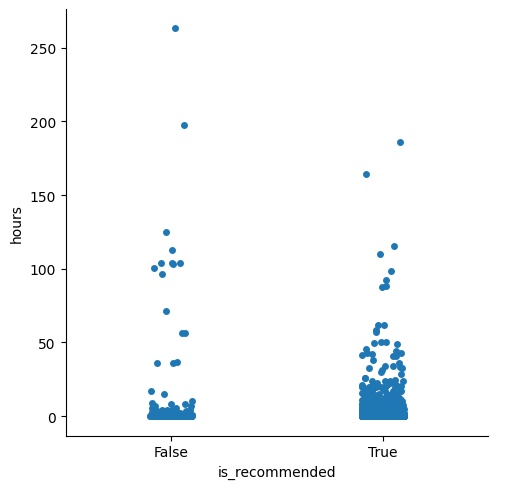

In [106]:
sns.catplot(data=data, x="is_recommended", y="hours")

In [107]:
y=data["is_recommended"]
y=y.map({True:1,False:0})

In [108]:

data=data.drop(["app_id","user_id","is_recommended","hours","tags"],axis=1)
data.head()

,Skiing,Robots,Survival,Beat 'em up,Education,Farming Sim,Real-Time with Pause,3D,Colony Sim,Party,...,Early Access,Medical Sim,Vampire,Linear,Dog,First-Person,Racing,Real Time Tactics,Hand-drawn,MMORPG
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
count=0
for vec in x:
    print(vec.sum())
    if vec.sum()==0:
        count+=1
print("Number of games that miss tags: ",count)

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)


In [135]:
def predict(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)
    model=RandomForestClassifier(n_estimators=100,max_depth=50,random_state=7)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    print("Mean squared error: ",mse)
    return mse

In [136]:
avg_mse=0
for user_id in top_users:
    x,y=build_train_test_set(user_id)
    avg_mse+=predict(x,y)
print("Average_mse:", avg_mse/len(top_users))

Mean squared error:  0.027536970933197347
Mean squared error:  0.052434456928838954
Mean squared error:  0.037420382165605094
Mean squared error:  0.0
Mean squared error:  0.0
Mean squared error:  0.0
Mean squared error:  0.2288329519450801
Mean squared error:  0.16549295774647887
Mean squared error:  0.2819593787335723
Mean squared error:  0.13307984790874525
Mean squared error:  0.2596754057428215
Mean squared error:  0.004195804195804196
Mean squared error:  0.048458149779735685
Mean squared error:  0.28711256117455136
Mean squared error:  0.0831889081455806
Mean squared error:  0.21202003338898165
Mean squared error:  0.05574912891986063
Mean squared error:  0.024208566108007448
Mean squared error:  0.3688073394495413
Mean squared error:  0.2653061224489796
Mean squared error:  0.027624309392265192
Mean squared error:  0.2707509881422925
Mean squared error:  0.0
Mean squared error:  0.07707509881422925
Mean squared error:  0.0
Mean squared error:  0.2066115702479339
Mean squared er

: 